In [1]:
import ee
import geemap
import pandas as pd
import dtale
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedKFold,train_test_split
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score,mean_absolute_percentage_error
import glob
import dask.dataframe as dd
from tpot import TPOTRegressor
import xarray as xr
from scipy import stats
from sklearn.svm import SVR
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import plot_partial_dependence
from warnings import filterwarnings
filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import plotly.express as px
import chart_studio.plotly as py
import folium
from folium.plugins import HeatMap
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)
from folium.plugins import FastMarkerCluster
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import os
from sklearn.inspection import permutation_importance


/Users/mdnhuda/opt/anaconda3/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning:




In [2]:
df= pd.read_csv('Combined_S2_LandSat8_S5_San_Francisco_100_July.csv')
df

,B1,B10,B11,B11_1,B12,B1_1,B2,B2_1,B3,B3_1,...,B5_1,B6,B6_1,B7,B7_1,B8,B8A,B9,NO2_column_number_density,sr_aerosol
0,478.5,3056.5,3032.0,2306.0,1396.0,1355.0,594.0,1137.5,940.0,1188.0,...,1356.0,2249.5,2883.5,1434.0,3306.0,3104.0,3489.0,809.5,0.000093,160
1,260.5,3060.0,3035.5,1516.0,888.0,1164.0,333.0,932.0,539.5,827.0,...,991.5,1556.5,1561.5,927.0,1827.0,1771.0,2010.0,602.5,0.000088,177
2,453.0,3065.5,3036.0,1315.5,1005.5,1445.0,651.5,1191.5,1093.5,1109.0,...,996.0,2280.5,1063.0,1681.0,1179.0,1088.5,1149.5,500.0,0.000101,145
3,655.5,3130.0,3095.5,3851.5,2402.5,1382.0,877.5,1431.5,1334.0,1556.5,...,2285.0,3783.0,2586.0,2388.5,2906.5,2820.5,3352.5,1031.0,0.000092,98
4,3086.0,2859.5,2862.5,4099.5,2947.0,4821.5,3078.0,4568.5,2960.0,4246.5,...,4331.5,2503.5,4434.0,1881.5,4615.0,4338.5,4701.0,1390.0,0.000063,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,755.0,3080.0,3057.5,3578.0,2527.0,1498.0,965.0,1492.0,1449.0,1640.5,...,2344.0,3696.0,2602.0,2684.5,2913.5,2950.0,3242.5,931.0,0.000103,96
96,2303.5,2862.0,2864.0,4505.0,3235.5,5320.5,2255.5,5235.5,2154.5,4898.0,...,5057.5,2005.5,5113.0,1669.5,5279.0,5105.0,5340.0,1744.0,0.000065,38
97,371.0,3004.5,2978.5,2673.0,1816.0,1296.0,499.5,1053.5,698.0,1014.5,...,1275.5,2301.5,2705.5,1626.5,3366.5,3337.0,3668.0,978.0,0.000085,113
98,508.5,3120.5,3088.5,2475.5,1839.5,1401.0,690.0,1287.5,1161.0,1372.5,...,1865.5,2540.0,2149.0,1953.5,2377.5,2318.5,2565.0,700.0,0.000095,113


In [3]:
X=df.drop('NO2_column_number_density',axis=1).values
y=df['NO2_column_number_density'].values

scaler=MinMaxScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
df_San_Francisco= pd.read_csv('Combined_S2_LandSat8_S5_San_Francisco_July_5000_Points.csv')
X_San_Francisco=df_San_Francisco.drop('NO2_column_number_density',axis=1).values
y_San_Francisco=df_San_Francisco['NO2_column_number_density'].values

scaler=MinMaxScaler()
X_San_Francisco=scaler.fit_transform(X_San_Francisco)
y_San_Francisco=scaler.fit_transform(y_San_Francisco.reshape(-1, 1))

X_train_San_Francisco, X_test_San_Francisco, y_train_San_Francisco, y_test_San_Francisco = train_test_split(X_San_Francisco, y_San_Francisco, test_size=0.30, random_state=42)

In [5]:
df_Texas= pd.read_csv('Combined_S2_LandSat8_S5_Texas_July_5000_Points.csv')
X_Texas=df_Texas.drop('NO2_column_number_density',axis=1).values
y_Texas=df_Texas['NO2_column_number_density'].values

scaler=MinMaxScaler()
X_Texas=scaler.fit_transform(X_Texas)
y_Texas=scaler.fit_transform(y_Texas.reshape(-1, 1))

X_train_Texas, X_test_Texas, y_train_Texas, y_test_Texas = train_test_split(X_Texas, y_Texas, test_size=0.30, random_state=42)


In [6]:
df_North_Dakota= pd.read_csv('Combined_S2_LandSat8_S5_North_Dakota_July_5000_Points.csv')
X_North_Dakota=df_North_Dakota.drop('NO2_column_number_density',axis=1).values
y_North_Dakota=df_North_Dakota['NO2_column_number_density'].values

scaler=MinMaxScaler()
X_North_Dakota=scaler.fit_transform(X_North_Dakota)
y_North_Dakota=scaler.fit_transform(y_North_Dakota.reshape(-1, 1))

X_train_North_Dakota, X_test_North_Dakota, y_train_North_Dakota, y_test_North_Dakota = train_test_split(X_North_Dakota, y_North_Dakota, test_size=0.30, random_state=42)


In [7]:
df_Washington_DC= pd.read_csv('Combined_S2_LandSat8_S5_Washington_DC_July_5000_Points.csv')
X_Washington_DC=df_Washington_DC.drop('NO2_column_number_density',axis=1).values
y_Washington_DC=df_Washington_DC['NO2_column_number_density'].values

scaler=MinMaxScaler()
X_Washington_DC=scaler.fit_transform(X_Washington_DC)
y_Washington_DC=scaler.fit_transform(y_Washington_DC.reshape(-1, 1))

X_train_Washington_DC, X_test_Washington_DC, y_train_Washington_DC, y_test_Washington_DC = train_test_split(X_Washington_DC, y_Washington_DC, test_size=0.30, random_state=42)

In [8]:
model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=15)
# fit model
model.fit(X_train,y_train)
# make a prediction
prediction=model.predict(X_test)
print('Training Accuracy : %.3f'% model.score(X_train,y_train))

print('Test Accuracy : %.3f'%model.score(X_test,y_test))

Training Accuracy : 0.981
Test Accuracy : 0.630


Mean Squared Error = 0.024210283498649753
Mean absolute percentage error = 0.4551223193247302


Text(0, 0.5, 'NO2_column_number_density')

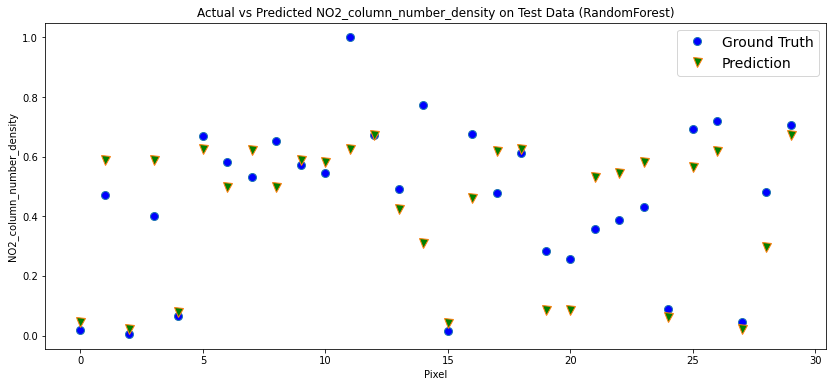

In [9]:
prediction=model.predict(X_test)
MSE=mean_squared_error(y_test,prediction)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test,prediction)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Test Data (RandomForest)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')


Mean Squared Error = 0.024210283498649753
Mean absolute percentage error = 0.4551223193247302
Accuracy for San Francisco: 0.630


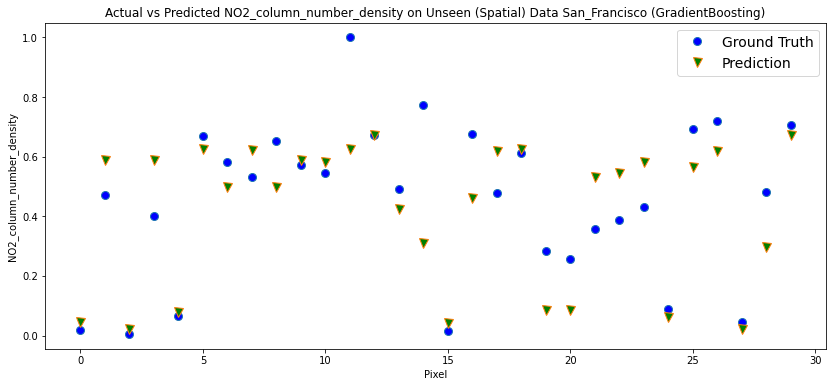

In [10]:
prediction_San_Francisco=model.predict(X_test_San_Francisco)
MSE=mean_squared_error(y_test_San_Francisco,prediction_San_Francisco)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_San_Francisco,prediction_San_Francisco)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_San_Francisco,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_San_Francisco,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data San_Francisco (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

print('Accuracy for San Francisco: %.3f'%model.score(X_test_San_Francisco,y_test_San_Francisco))

Mean Squared Error = 0.15737226235990132
Mean absolute percentage error = 2.0534697694373194
Accuracy for Texas: -3.145


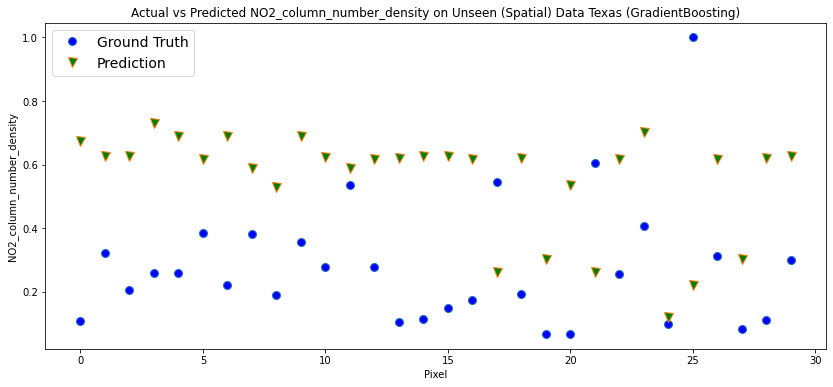

In [11]:
prediction_Texas=model.predict(X_test_Texas)
MSE=mean_squared_error(y_test_Texas,prediction_Texas)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_Texas,prediction_Texas)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_Texas,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_Texas,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data Texas (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

print('Accuracy for Texas: %.3f'%model.score(X_test_Texas,y_test_Texas))

Mean Squared Error = 0.10270106178026912
Mean absolute percentage error = 2.7205824300561994
Accuracy for North_Dakota: -1.452


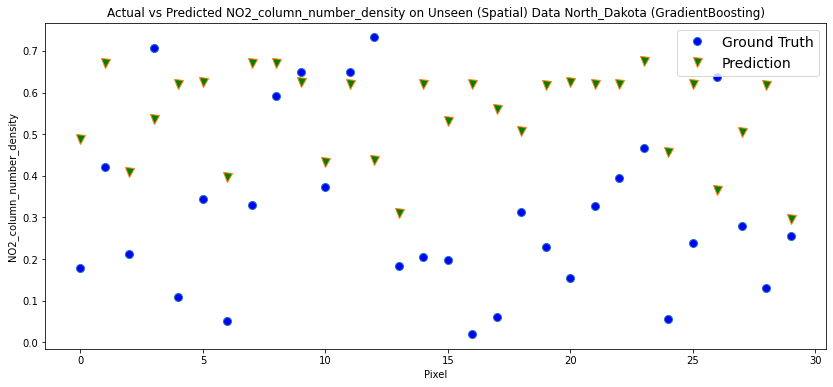

In [12]:
prediction_North_Dakota=model.predict(X_test_North_Dakota)
MSE=mean_squared_error(y_test_North_Dakota,prediction_North_Dakota)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_North_Dakota,prediction_North_Dakota)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_North_Dakota,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_North_Dakota,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data North_Dakota (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')


print('Accuracy for North_Dakota: %.3f'%model.score(X_test_North_Dakota,y_test_North_Dakota))

Mean Squared Error = 0.07934140927770829
Mean absolute percentage error = 1.2748705909533773
Accuracy for Washington_DC: -0.242


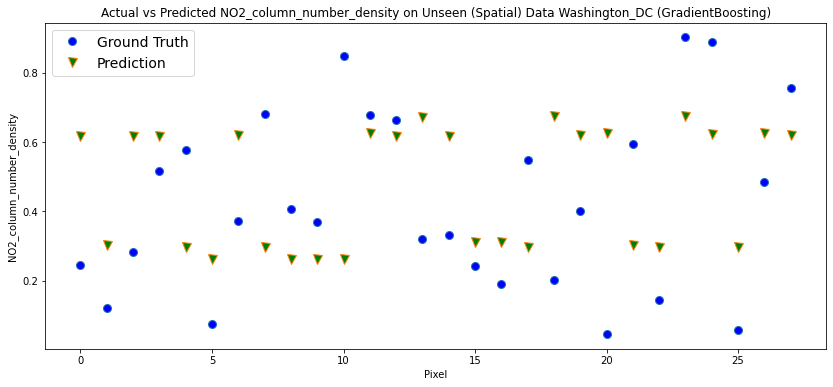

In [13]:
prediction_Washington_DC=model.predict(X_test_Washington_DC)
MSE=mean_squared_error(y_test_Washington_DC,prediction_Washington_DC)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_Washington_DC,prediction_Washington_DC)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_Washington_DC,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_Washington_DC,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data Washington_DC (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

print('Accuracy for Washington_DC: %.3f'%model.score(X_test_Washington_DC,y_test_Washington_DC))

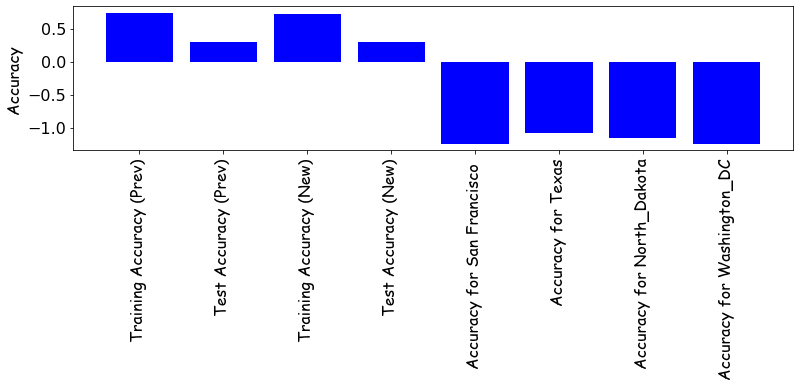

In [14]:
fig = plt.figure(figsize=(10,2))
ax = fig.add_axes([0,0,1,1])
label = ['Training Accuracy (Prev)', 'Test Accuracy (Prev)','Training Accuracy (New)', 'Test Accuracy (New)',
          'Accuracy for San Francisco ','Accuracy for Texas','Accuracy for North_Dakota','Accuracy for Washington_DC']
Accuracy = [0.737,0.298,0.725,0.300,-1.243,-1.086,-1.160,-1.245]
ax.bar(label,Accuracy,color='b')
ax.set_ylabel('Accuracy',fontsize=16, fontname='Comic Sans MS')

#ax.tick_params(axis='x', colors='blue')

#ax.set_title('Variation of E(TPa)',fontsize=16)
#plt.savefig('Accuracy', dpi=72, bbox_inches='tight')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16,rotation=90, fontname='Comic Sans MS')
plt.show()

In [15]:
dtale.show(df_Washington_DC)

In [16]:
dtale.show(df_Texas)

In [17]:
dtale.show(df_North_Dakota)

In [18]:
dtale.show(X_test_North_Dakota)